In [337]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import math

import matplotlib.ticker as ticker
import seaborn as sns

from matplotlib import style
style.use('bmh')
plt.rcParams['figure.facecolor'] = 'white'
plt.rc('axes', facecolor='#FFFFFF')

%load_ext autoreload
%autoreload 2
from analysis_utils import bin, binned_scatterplot, label_bin

pd.set_option('display.max_columns', None)  # or 1000

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [338]:
sns.set(font='Helvetica',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
'axes.facecolor': 'None',
'axes.grid': False,
"font.size":14,
"axes.titlesize":14,
"axes.labelsize":14,
#'axes.labelcolor': 'dimgrey',
'axes.spines.right': False,
'axes.spines.top': False,
'figure.facecolor': 'white',
'lines.solid_capstyle': 'round',
'patch.edgecolor': 'w',
'patch.force_edgecolor': True,
#'text.color': 'dimgrey',
'xtick.bottom': False,
'xtick.color': 'black',
'xtick.direction': 'out',
'xtick.top': False,
'ytick.color': 'black',
'ytick.direction': 'out',
'ytick.left': False,
'ytick.right': False})
sns.set_context("notebook", rc={"font.size":14,
                                "axes.titlesize":14,
                                "axes.labelsize":14})

In [67]:
cbsa_data = pd.read_csv('/Users/jericho/Documents/csi/family-geog/data/clean/cbsa/cbsa_summary.csv')
cbsa_data['GTCBSA'] = cbsa_data['GTCBSA'].astype(str).apply(lambda x: x.zfill(5))
cbsa_data.head(3)

def bin_equal(array,bins):
    amin,amax = min(array),max(array)
    step = (amax-amin)/bins
    bins = [(i-amin)//step for i in array]
    mbin = max(bins)
    bin_partitions = [amin+step*i for i in range(int(mbin)+2)]
    return bins, bin_partitions

cbsa_data = pd.read_csv('/Users/jericho/Documents/csi/family-geog/data/clean/cbsa/cbsa_summary.csv')
cbsa_data['GTCBSA'] = cbsa_data['GTCBSA'].astype(str).apply(lambda x: x.zfill(5))
cbsa_data.head(3)

cbsa_df = copy.deepcopy(cbsa_data[['GTCBSA', 'ALAND', 'POP', 'LOG_POP', 'AVG_FAMILY_TIME', 'AVG_NHFAMILY_IX', 
            'AVG_FAMILY_IX','AVG_NHFAMILY_NONWORK_TIME', 'AVG_FRIEND_NONWORK_TIME', 
            'AVG_CCC_NONWORK_TIME', 'AVG_NHSOCIAL_TIME', 'AVG_NHFAMILY_SOCIAL_TIME_RATIO']])

bins,partitions = bin_equal(cbsa_df['LOG_POP'],6)
cbsa_df['bin'] = bins
cbsa_df['sum'] = cbsa_df['AVG_NHFAMILY_NONWORK_TIME'] + cbsa_df['AVG_FRIEND_NONWORK_TIME'] + cbsa_df['AVG_CCC_NONWORK_TIME']
cbsa_df = cbsa_df[['GTCBSA','bin', 'POP', 'LOG_POP','ALAND']]
cbsa_df.head(3)

GTCBSA  bin     POP  LOG_POP        ALAND
0  10180  0.0  170669     5.23  2743.498528
1  10420  2.0  703845     5.85   900.193013
2  10580  2.0  880736     5.94  2811.726831

In [303]:
cbsa_region = pd.read_csv('~/Documents/csi/csi-research/Data/cbsa-county-region-crosswalk.csv')
cbsa_region = cbsa_region[['CBSA Code','Region','Sub Region']]
cbsa_region = cbsa_region.drop_duplicates()
cbsa_region.columns = ['GTCBSA','Region','Division']
cbsa_region

GTCBSA     Region            Division
0      10100    Midwest  West North Central
2      10140       West             Pacific
3      10180      South  West South Central
6      10220      South  West South Central
7      10260          0                   0
...      ...        ...                 ...
1876   49660  Northeast     Middle Atlantic
1877   49700       West             Pacific
1879   49740       West            Mountain
1880   49780    Midwest  East North Central
1881   49820      South  West South Central

[957 rows x 3 columns]

In [68]:
cbsa_df['pi_land'] = cbsa_df['ALAND'].apply(lambda x: (x/math.pi)**0.5)

In [103]:
cbsa_binned = cbsa_df.groupby('bin').sum()
#cbsa_binned = cbsa_binned['POP']
cbsa_binned

POP  LOG_POP          ALAND      pi_land
bin                                               
0.0  12031517   375.47  109461.355296  1474.541881
1.0  31025829   476.74  166803.985221  2062.248990
2.0  48167803   342.54  194971.261520  1793.324972
3.0  54035601   158.13  118037.107257   945.290573
4.0  72368204    93.81  110688.153346   665.617989
5.0  42052455    21.39   18731.101932   133.281981

In [5]:
# df = pd.read_csv('/Users/jericho/Documents/csi/family-geog/data/clean/atus_responses_2016-2019.csv')
# df = df[['TUCASEID','NHFAMILY_IX','TRIP_TO_NHFAMILY_DUR','TRIP_TO_NHFAMILY_MODE','TRIP_TO_NH_DEST']]
# df = df[df['NHFAMILY_IX']==1]
# print(len(df))

# x = [1 if i>0 else 0 for i in df['TRIP_TO_NHFAMILY_DUR'].tolist()]
# print(sum(x)/len(x))
# x = [1 if i>0 else 0 for i in df['TRIP_TO_NHFAMILY_MODE'].tolist()]
# print(sum(x)/len(x))
# x = [1 if i>0 else 0 for i in df['TRIP_TO_NH_DEST'].tolist()]
# print(sum(x)/len(x))

In [229]:
df = pd.read_csv('/Users/jericho/Documents/csi/family-geog/data/clean/atus_responses_2016-2019.csv')
weights_df = pd.read_csv('/Users/jericho/Documents/csi/family-geog/data/clean/cbsa_adjusted_weights_6_iter.csv')
df.columns.tolist()
#df = df[['TUCASEID','NHFAMILY_IX','LONGEST_TRIP_DUR','LONGEST_TRIP_TIER2CODE','TRIP_TO_NHFAMILY_DUR','TRIP_TO_NHFAMILY_MODE','GTCBSA']]
df['GTCBSA'] = df['GTCBSA'].astype(str)
df = df.merge(cbsa_df,how='left',on='GTCBSA')
df = df[['TUCASEID','NHFAMILY_IX','LONGEST_TRIP_DUR','LONGEST_TRIP_TIER2CODE','TRIP_TO_NHFAMILY_DUR','TRIP_TO_NHFAMILY_MODE','bin','pi_land']]
df = df.merge(weights_df, how='left', on='TUCASEID')
df

TUCASEID  NHFAMILY_IX  LONGEST_TRIP_DUR  LONGEST_TRIP_TIER2CODE  \
0      20160101160045            1              15.0                    12.0   
1      20160101160066            1               NaN                     NaN   
2      20160101160069            0              30.0                     7.0   
3      20160101160083            0               NaN                     NaN   
4      20160101160084            1              20.0                     7.0   
...               ...          ...               ...                     ...   
39739  20191212192229            1               NaN                     NaN   
39740  20191212192255            1              45.0                     2.0   
39741  20191212192256            0              30.0                     4.0   
39742  20191212192265            0              60.0                     5.0   
39743  20191212192270            1              30.0                    12.0   

       TRIP_TO_NHFAMILY_DUR  TRIP_TO_NHFAMILY_MODE  bin    pi_land  NEW_WEIGHT  
0                      15.0                   12.0  4.0  52.580595     20976.0  
1                       NaN                    NaN  NaN        NaN         NaN  
2                       NaN                    NaN  4.0  45.722507     18319.0  
3                       NaN                    NaN  NaN        NaN         NaN  
4                       NaN                    NaN  NaN        NaN         NaN  
...                     ...                    ...  ...        ...         ...  
39739                   NaN                    NaN  2.0  28.713752     17294.0  
39740                  45.0                   12.0  NaN        NaN         NaN  
39741                   NaN                    NaN  NaN        NaN         NaN  
39742                   NaN                    NaN  4.0  43.224743     18999.0  
39743                  30.0                   13.0  4.0  38.278419     29451.0  

[39744 rows x 9 columns]

Index(['TUCASEID', 'NHFAMILY_IX', 'LONGEST_TRIP_DUR', 'LONGEST_TRIP_TIER2CODE',
       'TRIP_TO_NHFAMILY_DUR', 'TRIP_TO_NHFAMILY_MODE', 'bin', 'pi_land'],
      dtype='object')


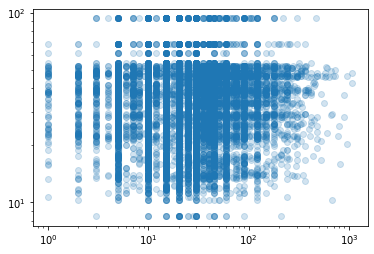

TUCASEID  NHFAMILY_IX  LONGEST_TRIP_DUR  LONGEST_TRIP_TIER2CODE  \
bin                                                                        
0.0  2.017587e+13          0.0          1.665028                8.860016   
1.0  2.017532e+13          0.0          1.412319                9.367615   
2.0  2.017529e+13          0.0          1.082142                9.117045   
3.0  2.017523e+13          0.0          0.878359                9.417099   
4.0  2.017520e+13          0.0          0.805699                9.470447   
5.0  2.017485e+13          0.0          0.823808                9.410403   

     TRIP_TO_NHFAMILY_DUR  TRIP_TO_NHFAMILY_MODE    pi_land  
bin                                                          
0.0                   NaN                    NaN  20.516076  
1.0                   NaN                    NaN  23.930972  
2.0                   NaN                    NaN  32.310236  
3.0                   NaN                    NaN  38.742690  
4.0                   NaN                    NaN  46.810361  
5.0                   NaN                    NaN  44.709453

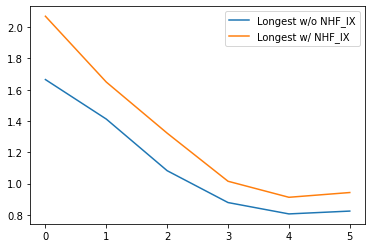

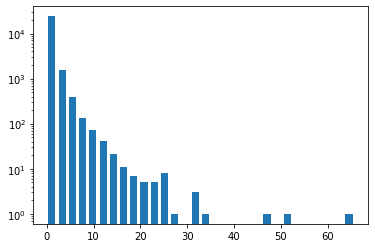

In [7]:
def plot_trip_data(df):
    df_binned = df[df['NHFAMILY_IX']==0].groupby('bin').mean()
    display(df_binned)
    plt.plot(df_binned['LONGEST_TRIP_DUR'],label='Longest w/o NHF_IX')
    df2 = df[df['NHFAMILY_IX']==1]
    df_binned = df2.groupby('bin').mean()
    plt.plot(df_binned['LONGEST_TRIP_DUR'],label='Longest w/ NHF_IX')
    plt.legend()
    plt.show()
    plt.hist(df['LONGEST_TRIP_DUR'],bins=30,rwidth=0.7)
    plt.yscale('log')
    plt.show()

df2 = copy.deepcopy(df)
print(df2.columns)

plt.scatter(df2['LONGEST_TRIP_DUR'],df2['pi_land'],alpha=0.2)
plt.xscale('log')
plt.yscale('log')
plt.show()

df2['LONGEST_TRIP_DUR'] = df2['LONGEST_TRIP_DUR'] / df['pi_land']

plot_trip_data(df2)

In [8]:
rows = []
counts = []

def plot_binned_thresh_ix(df_in,thresh,save=False,plot=False):
    df = copy.deepcopy(df_in)
    df['indicator'] = [1 if i <= thresh else 0 for i in df['LONGEST_TRIP_DUR'].tolist()]
    df['NHFAMILY_IX_ADJ'] = df['indicator'] + df['NHFAMILY_IX']
    df['NHFAMILY_IX_ADJ'] = [1 if i==2 else 0 for i in df['NHFAMILY_IX_ADJ'].tolist()]
    count = sum(df['NHFAMILY_IX_ADJ'].tolist())
    df_binned = df.groupby('bin').mean()
    rows.append(df_binned['NHFAMILY_IX_ADJ'].tolist())
    counts.append(count)

    plt.plot(df_binned['NHFAMILY_IX_ADJ'])
    plt.scatter(df_binned.index.tolist(),df_binned['NHFAMILY_IX_ADJ'])

    thresh = str(thresh)
    while len(thresh) < 3:
        thresh = '0'+thresh
    plt.title('Threshold: '+str(thresh)+', Count IX: '+str(count))
    #plt.ylim((0,0.25))
    if save:
        plt.savefig(f'/Users/jericho/Documents/csi/csi-research/plots/binned_thresh/thresh_{thresh}_count_{count}.jpeg')
        plt.clf()
    else:
        if plot == True:
            plt.show()
        else:
            plt.clf()

for i in range(101):
    plot_binned_thresh_ix(df,i,save=False,plot=False)

<Figure size 432x288 with 0 Axes>

In [9]:
import glob
from PIL import Image

# filepaths
fp_in = "/Users/jericho/Documents/csi/csi-research/plots/binned_thresh/thresh*.jpeg"
fp_out = "/Users/jericho/Documents/csi/csi-research/plots/binned_thresh//image.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
imgs = (Image.open(f) for f in sorted(glob.glob(fp_in)))
img = next(imgs)  # extract first image from iterator
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)

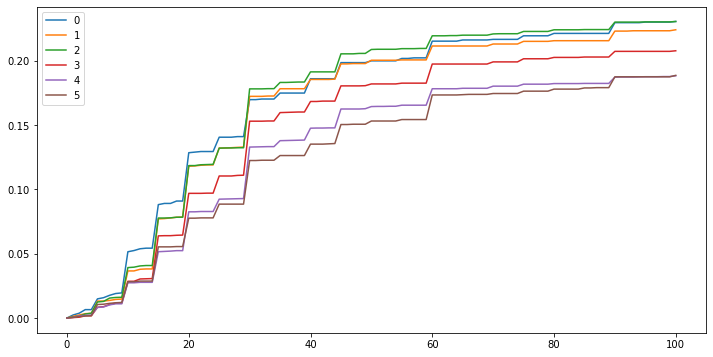

In [10]:
plt.figure(figsize=(12,6))
for j in range(len(rows[0])):
    plt.plot([i[j] for i in rows],label=str(j))
plt.legend()

In [60]:
# import glob
# from PIL import Image

# for k in range(0,72):
#     fig = plt.figure(figsize=(14,12))
#     ax = plt.axes(projection='3d')
#     for j in range(len(rows[0])):
#         z = [i[j] for i in rows]
#         x = [i for i in range(len(z))]
#         y = [j]*len(z)
#         ax.plot(x,y,z,label='Bin '+str(j))
#     for j in range(len(rows)):
#         z = rows[j]
#         x = [j for i in range(len(rows[0]))]
#         y = [i for i in range(len(rows[0]))]
#         ax.plot(x,y,z,c='grey',alpha=0.05)
#     ax.view_init(0,5*k)
#     plt.legend()
#     num = str(k)
#     while len(num) < 2:
#         num = '0'+num
#     plt.savefig(f'/Users/jericho/Documents/csi/csi-research/plots/binned_thresh_3d/view{num}.jpeg')
#     plt.clf()

# fp_in = "/Users/jericho/Documents/csi/csi-research/plots/binned_thresh_3d/*.jpeg"
# fp_out = "/Users/jericho/Documents/csi/csi-research/plots/binned_thresh_3d/image.gif"

# imgs = (Image.open(f) for f in sorted(glob.glob(fp_in)))
# img = next(imgs)  # extract first image from iterator
# img.save(fp=fp_out, format='GIF', append_images=imgs,
#          save_all=True, duration=510, loop=0)

# plt.close()


In [14]:
# import random
# arrays = []

# for i in range(100):
#     row = [0]
#     for j in range(1000):
#         row.append(math.sin(j/100)+random.random()*.05-math.cos(j/100)*random.random())
#     row = row[1:]
#     arrays.append(row)

# plt.figure(figsize=(12,12))
# for row in arrays:
#     plt.plot(row,c='black',alpha=0.01)

(0.0, 0.25)

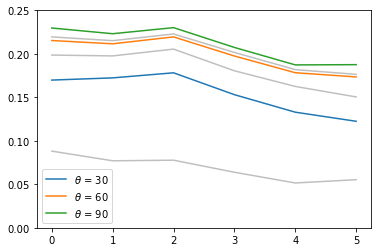

In [30]:
plt.plot(rows[15],c='grey',alpha=0.5)
plt.plot(rows[30],c='tab:blue',label=r'$\theta$ = 30')
plt.plot(rows[45],c='grey',alpha=0.5)
plt.plot(rows[60],c='tab:orange',label=r'$\theta$ = 60')
plt.plot(rows[75],c='grey',alpha=0.5)
plt.plot(rows[90],c='tab:green',label=r'$\theta$ = 90')
plt.legend()
plt.ylim(0,0.25)

In [58]:
x = [[i,i**2] for i in range(10)]
transpose_list = lambda x: [[i[j] for i in x] for j in range(len(x[0]))]
x_T = transpose_list(x)
print(x)
print(x_T)

[[0, 0], [1, 1], [2, 4], [3, 9], [4, 16], [5, 25], [6, 36], [7, 49], [8, 64], [9, 81]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]]


In [61]:
df

TUCASEID  NHFAMILY_IX  LONGEST_TRIP_DUR  LONGEST_TRIP_TIER2CODE  \
0      20160101160045            1              15.0                    12.0   
1      20160101160066            1               NaN                     NaN   
2      20160101160069            0              30.0                     7.0   
3      20160101160083            0               NaN                     NaN   
4      20160101160084            1              20.0                     7.0   
...               ...          ...               ...                     ...   
39739  20191212192229            1               NaN                     NaN   
39740  20191212192255            1              45.0                     2.0   
39741  20191212192256            0              30.0                     4.0   
39742  20191212192265            0              60.0                     5.0   
39743  20191212192270            1              30.0                    12.0   

       TRIP_TO_NHFAMILY_DUR  TRIP_TO_NHFAMILY_MODE  bin    pi_land  
0                      15.0                   12.0  4.0  52.580595  
1                       NaN                    NaN  NaN        NaN  
2                       NaN                    NaN  4.0  45.722507  
3                       NaN                    NaN  NaN        NaN  
4                       NaN                    NaN  NaN        NaN  
...                     ...                    ...  ...        ...  
39739                   NaN                    NaN  2.0  28.713752  
39740                  45.0                   12.0  NaN        NaN  
39741                   NaN                    NaN  NaN        NaN  
39742                   NaN                    NaN  4.0  43.224743  
39743                  30.0                   13.0  4.0  38.278419  

[39744 rows x 8 columns]

# Apply new method

In [93]:
def family_and_travel(s):
    return 1 if (s['NHFAMILY_IX']==1 and s['TRIP_IX']==1) else 0

def family_no_travel(s):
    return 1 if (s['NHFAMILY_IX']==1 and s['TRIP_IX']==0) else 0

def travel_no_family(s):
    return 1 if (s['NHFAMILY_IX']==0 and s['TRIP_IX']==1) else 0

def no_family_no_travel(s):
    return 1 if (s['NHFAMILY_IX']==0 and s['TRIP_IX']==0) else 0

def family_local_trip(s,t=60):
    return 1 if (s['NHFAMILY_IX']==1 and s['LONGEST_TRIP_DUR']<=t) else 0

def family_nonlocal_trip(s,t=60):
    return 1 if (s['NHFAMILY_IX']==1 and s['LONGEST_TRIP_DUR']>t) else 0

In [129]:
df['TRIP_IX'] = df['LONGEST_TRIP_DUR'].apply(lambda x: 0 if np.isnan(x) else 1)
df['RAW_COUNT'] = 1
df['FAM_TRAVEL'] = df.apply(family_and_travel, axis=1)
df['FAM_NOTRAVEL'] = df.apply(family_no_travel, axis=1)
df['NOFAM_TRAVEL'] = df.apply(travel_no_family, axis=1)
df['NOFAM_NOTRAVEL'] = df.apply(no_family_no_travel, axis=1)
df['FAM_DIST_THRESH'] = df.apply(family_local_trip, axis=1)
df['FAM_OVERDIST_THRESH'] = df.apply(family_nonlocal_trip, axis=1)

df = df[~df['bin'].isna()]

cols = df.columns.tolist()
for col in cols[-8:]:
    df[col] = df[col] * df['NEW_WEIGHT']

df

/var/folders/qv/9w3wskgd1pj1k5ffzq67k54c0000gn/T/ipykernel_11875/3752189926.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col] * df['NEW_WEIGHT']


TUCASEID  NHFAMILY_IX  LONGEST_TRIP_DUR  LONGEST_TRIP_TIER2CODE  \
0      20160101160045            1              15.0                    12.0   
2      20160101160069            0              30.0                     7.0   
5      20160101160094            0              10.0                    13.0   
6      20160101160116            0              20.0                     3.0   
8      20160101160139            0               5.0                    13.0   
...               ...          ...               ...                     ...   
39736  20191212192170            1              30.0                     5.0   
39738  20191212192214            0               5.0                     7.0   
39739  20191212192229            1               NaN                     NaN   
39742  20191212192265            0              60.0                     5.0   
39743  20191212192270            1              30.0                    12.0   

       TRIP_TO_NHFAMILY_DUR  TRIP_TO_NHFAMILY_MODE  bin    pi_land  \
0                      15.0                   12.0  4.0  52.580595   
2                       NaN                    NaN  4.0  45.722507   
5                       NaN                    NaN  4.0  40.160254   
6                       NaN                    NaN  5.0  46.126647   
8                       NaN                    NaN  3.0  38.041705   
...                     ...                    ...  ...        ...   
39736                  30.0                   12.0  2.0  25.379695   
39738                   NaN                    NaN  3.0  33.522427   
39739                   NaN                    NaN  2.0  28.713752   
39742                   NaN                    NaN  4.0  43.224743   
39743                  30.0                   13.0  4.0  38.278419   

       NEW_WEIGHT  TRIP_IX  RAW_COUNT  FAM_TRAVEL  FAM_NOTRAVEL  NOFAM_TRAVEL  \
0         20976.0  20976.0    20976.0     20976.0           0.0           0.0   
2         18319.0  18319.0    18319.0         0.0           0.0       18319.0   
5         57019.0  57019.0    57019.0         0.0           0.0       57019.0   
6         33681.0  33681.0    33681.0         0.0           0.0       33681.0   
8         18784.0  18784.0    18784.0         0.0           0.0       18784.0   
...           ...      ...        ...         ...           ...           ...   
39736     13707.0  13707.0    13707.0     13707.0           0.0           0.0   
39738     34842.0  34842.0    34842.0         0.0           0.0       34842.0   
39739     17294.0      0.0    17294.0         0.0       17294.0           0.0   
39742     18999.0  18999.0    18999.0         0.0           0.0       18999.0   
39743     29451.0  29451.0    29451.0     29451.0           0.0           0.0   

       NOFAM_NOTRAVEL  FAM_DIST_THRESH  FAM_OVERDIST_THRESH  
0                 0.0          20976.0                  0.0  
2                 0.0              0.0                  0.0  
5                 0.0              0.0                  0.0  
6                 0.0              0.0                  0.0  
8                 0.0              0.0                  0.0  
...               ...              ...                  ...  
39736             0.0          13707.0                  0.0  
39738             0.0              0.0                  0.0  
39739             0.0              0.0                  0.0  
39742             0.0              0.0                  0.0  
39743             0.0          29451.0                  0.0  

[31663 rows x 17 columns]

$Q(p)$ = Population in bin $p$  
$\pi(\ell=0|p)$ = percentage of people without travel but with family contact  
$\sum_{\ell \gt 0}^{\hat\ell(p)}\pi(\ell|p)$ = the % people who have non-zero travel up to the threshold and contact with family  
$\sum_{p^{'}}Q(p^{'})\sum_{\ell>\hat{\ell}(p^{'})}\pi(\ell|p^{'})$ = the number of all visits that are non-local across all population values

In [214]:
df_bins = df.groupby('bin').sum()

cols = df_bins.columns.tolist()
for col in cols[-8:]:
    print(col)
    df_bins[col] = df_bins[col] / df_bins['NEW_WEIGHT']

df_bins = pd.concat([df_bins,cbsa_binned],axis=1)


df_bins['non_local_visits_p'] = df_bins['FAM_OVERDIST_THRESH'] #/ df_bins['RAW_COUNT']
df_bins['non_local_visits'] = df_bins['non_local_visits_p'] * df_bins['NEW_WEIGHT']#df_bins['POP']
df_bins['local_visits']
df_bins

TRIP_IX
RAW_COUNT
FAM_TRAVEL
FAM_NOTRAVEL
NOFAM_TRAVEL
NOFAM_NOTRAVEL
FAM_DIST_THRESH
FAM_OVERDIST_THRESH


TUCASEID  NHFAMILY_IX  LONGEST_TRIP_DUR  \
bin                                                      
0.0   43478477073070680          574           56288.0   
1.0   78299879039427360         1017          102922.0   
2.0  125105974422678896         1690          168978.0   
3.0  132995030829735312         1589          184546.0   
4.0  170298894276358880         1857          256259.0   
5.0   88627770656554048          993          139837.0   

     LONGEST_TRIP_TIER2CODE  TRIP_TO_NHFAMILY_DUR  TRIP_TO_NHFAMILY_MODE  \
bin                                                                        
0.0                 15923.0                8812.0                 5216.0   
1.0                 30926.0               18077.0                 9232.0   
2.0                 49053.0               29228.0                15293.0   
3.0                 52416.0               27370.0                14543.0   
4.0                 69594.0               34833.0                16939.0   
5.0                 35917.0               18899.0                 8594.0   

           pi_land   NEW_WEIGHT   TRIP_IX  RAW_COUNT  ...  NOFAM_TRAVEL  \
bin                                                   ...                 
0.0   44152.585173   33845090.0  0.835796        1.0  ...      0.593453   
1.0   92885.203798   92167149.0  0.826470        1.0  ...      0.590549   
2.0  200603.399207  150987826.0  0.840850        1.0  ...      0.603072   
3.0  255872.108686  175298939.0  0.843699        1.0  ...      0.629517   
4.0  396607.764212  234584088.0  0.850129        1.0  ...      0.647096   
5.0  196464.762470  138357396.0  0.850112        1.0  ...      0.653200   

     NOFAM_NOTRAVEL  FAM_DIST_THRESH  FAM_OVERDIST_THRESH       POP  LOG_POP  \
bin                                                                            
0.0        0.142611         0.219077             0.023266  12031517   375.47   
1.0        0.149437         0.205293             0.030629  31025829   476.74   
2.0        0.136778         0.210576             0.027202  48167803   342.54   
3.0        0.134647         0.192654             0.021529  54035601   158.13   
4.0        0.132794         0.180025             0.023007  72368204    93.81   
5.0        0.127379         0.168887             0.028025  42052455    21.39   

             ALAND      pi_land  non_local_visits_p  non_local_visits  
bin                                                                    
0.0  109461.355296  1474.541881            0.023266          787430.0  
1.0  166803.985221  2062.248990            0.030629         2822985.0  
2.0  194971.261520  1793.324972            0.027202         4107231.0  
3.0  118037.107257   945.290573            0.021529         3773950.0  
4.0  110688.153346   665.617989            0.023007         5397162.0  
5.0   18731.101932   133.281981            0.028025         3877458.0  

[6 rows x 22 columns]

In [223]:
df_bins['numerator'] = df_bins['NEW_WEIGHT']**2 * df_bins['FAM_NOTRAVEL'] * df_bins['FAM_DIST_THRESH']
df_bins['denominator'] = df_bins['NEW_WEIGHT'] * df_bins['FAM_DIST_THRESH'] + df_bins['non_local_visits']
df_bins['incoming_local_visits'] = df_bins['numerator'] / df_bins['denominator']
df_bins['outgoing_local_visits'] = df_bins['FAM_DIST_THRESH'] * df_bins['NEW_WEIGHT']
df_bins['all_visits'] = df_bins['outgoing_local_visits'] + df_bins['incoming_local_visits']
df_bins['visit_ratio'] = df_bins['all_visits'] / df_bins['NEW_WEIGHT']
df_bins

TUCASEID  NHFAMILY_IX  LONGEST_TRIP_DUR  \
bin                                                      
0.0   43478477073070680          574           56288.0   
1.0   78299879039427360         1017          102922.0   
2.0  125105974422678896         1690          168978.0   
3.0  132995030829735312         1589          184546.0   
4.0  170298894276358880         1857          256259.0   
5.0   88627770656554048          993          139837.0   

     LONGEST_TRIP_TIER2CODE  TRIP_TO_NHFAMILY_DUR  TRIP_TO_NHFAMILY_MODE  \
bin                                                                        
0.0                 15923.0                8812.0                 5216.0   
1.0                 30926.0               18077.0                 9232.0   
2.0                 49053.0               29228.0                15293.0   
3.0                 52416.0               27370.0                14543.0   
4.0                 69594.0               34833.0                16939.0   
5.0                 35917.0               18899.0                 8594.0   

           pi_land   NEW_WEIGHT   TRIP_IX  RAW_COUNT  ...          ALAND  \
bin                                                   ...                  
0.0   44152.585173   33845090.0  0.835796        1.0  ...  109461.355296   
1.0   92885.203798   92167149.0  0.826470        1.0  ...  166803.985221   
2.0  200603.399207  150987826.0  0.840850        1.0  ...  194971.261520   
3.0  255872.108686  175298939.0  0.843699        1.0  ...  118037.107257   
4.0  396607.764212  234584088.0  0.850129        1.0  ...  110688.153346   
5.0  196464.762470  138357396.0  0.850112        1.0  ...   18731.101932   

         pi_land  non_local_visits_p  non_local_visits     numerator  \
bin                                                                    
0.0  1474.541881            0.023266          787430.0  5.418757e+12   
1.0  2062.248990            0.030629         2822985.0  4.201612e+13   
2.0  1793.324972            0.027202         4107231.0  1.073995e+14   
3.0   945.290573            0.021529         3773950.0  1.281900e+14   
4.0   665.617989            0.023007         5397162.0  1.691745e+14   
5.0   133.281981            0.028025         3877458.0  7.276959e+13   

     denominator  incoming_local_visits  outgoing_local_visits    all_visits  \
bin                                                                            
0.0    8202107.0           6.606543e+05              7414677.0  8.075331e+06   
1.0   21744256.0           1.932286e+06             18921271.0  2.085356e+07   
2.0   35901575.0           2.991499e+06             31794344.0  3.478584e+07   
3.0   37545931.0           3.414217e+06             33771981.0  3.718620e+07   
4.0   47628272.0           3.551976e+06             42231110.0  4.578309e+07   
5.0   27244227.0           2.671009e+06             23366769.0  2.603778e+07   

     visit_ratio  
bin               
0.0     0.238597  
1.0     0.226258  
2.0     0.230388  
3.0     0.212130  
4.0     0.195167  
5.0     0.188192  

[6 rows x 28 columns]

In [215]:
# df_bins['numerator'] = df_bins['POP']**2 * (df_bins['FAM_NOTRAVEL'] / df_bins['RAW_COUNT'])  * (df_bins['FAM_DIST_THRESH'] / df_bins['RAW_COUNT'])
# df_bins['denominator'] = df_bins['POP'] * (df_bins['FAM_DIST_THRESH'] / df_bins['RAW_COUNT']) + sum(df_bins['non_local_visits'].tolist())
# df_bins['incoming_local_visits'] = df_bins['numerator'] / df_bins['denominator']
# df_bins['outgoing_local_visits'] = (df_bins['FAM_DIST_THRESH'] / df_bins['RAW_COUNT']) * df_bins['POP']
# df_bins['all_visits'] = df_bins['outgoing_local_visits'] + df_bins['incoming_local_visits']
# df_bins['visit_ratio'] = df_bins['all_visits'] / df_bins['POP']
# df_bins

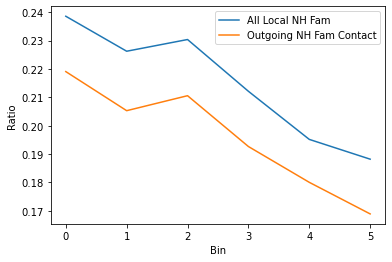

In [224]:
plt.plot(df_bins['visit_ratio'],label='All Local NH Fam')
plt.plot(df_bins['FAM_DIST_THRESH']/df_bins['RAW_COUNT'],label='Outgoing NH Fam Contact')
plt.xlabel('Bin')
plt.ylabel('Ratio') 
plt.legend()

In [226]:
all_visits = df_bins['visit_ratio'].tolist()
all_visits = [(i-min(all_visits))/(max(all_visits)-min(all_visits)) for i in all_visits]
bins = df_bins.index.tolist()
data = np.array([[1, bins[i],all_visits[i]] for i in range(len(bins))])
X,y = data[:,0:2], data[:,2]
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
yhat = X.dot(b)
plt.scatter(X[:,1], y)
plt.plot(X[:,1], yhat, color='red')
plt.show()

SE = [(yhat[i]-y[i])**2 for i in range(len(y))]
SSE = sum(SE)
SS = [i**2 for i in y]
TSS = sum(SS)
R2 = 1-(SSE/TSS)
print("R^2 =",R2)

R^2 = 0.9761666039258892


### Calculate the weighted proportion of trips meeting threshold as threshold increases for each bin

In [414]:
df_wbin = df[~df['bin'].isna()]

temp = copy.deepcopy(df_wbin[['LONGEST_TRIP_DUR','bin','NEW_WEIGHT']])

weighted = []
unweighted = []

for i in range(1,101):
    temp = copy.deepcopy(df_wbin[['LONGEST_TRIP_DUR','bin','NEW_WEIGHT']])
    temp['RAW_COUNT'] = 1
    temp['TRIP_MET_THRESH'] = temp['LONGEST_TRIP_DUR'].apply(lambda x: 1 if x>i else 0)
    temp['WEIGHTED_TRIP_MET_THRESH'] = temp['TRIP_MET_THRESH'] * temp['NEW_WEIGHT']
    tempbin = temp.groupby('bin').sum()
    tempbin['MET_THRESH_RATIO_WEIGHTED'] = tempbin['WEIGHTED_TRIP_MET_THRESH'] / tempbin['NEW_WEIGHT']
    tempbin['MET_THRESH_RATIO_UNWEIGHTED'] = tempbin['TRIP_MET_THRESH'] / tempbin['RAW_COUNT']
    weighted.append(tempbin['MET_THRESH_RATIO_WEIGHTED'].tolist())
    unweighted.append(tempbin['MET_THRESH_RATIO_UNWEIGHTED'].tolist())
tempbin

LONGEST_TRIP_DUR   NEW_WEIGHT  RAW_COUNT  TRIP_MET_THRESH  \
bin                                                              
0.0           56288.0   33845090.0       2155               83   
1.0          102922.0   92167149.0       3881              137   
2.0          168978.0  150987826.0       6201              237   
3.0          184546.0  175298939.0       6592              232   
4.0          256259.0  234584088.0       8441              344   
5.0          139837.0  138357396.0       4393              176   

     WEIGHTED_TRIP_MET_THRESH  MET_THRESH_RATIO_WEIGHTED  \
bin                                                        
0.0                 1240145.0                   0.036642   
1.0                 3996888.0                   0.043366   
2.0                 6116349.0                   0.040509   
3.0                 6083113.0                   0.034701   
4.0                10166348.0                   0.043338   
5.0                 5654817.0                   0.040871   

     MET_THRESH_RATIO_UNWEIGHTED  
bin                               
0.0                     0.038515  
1.0                     0.035300  
2.0                     0.038220  
3.0                     0.035194  
4.0                     0.040753  
5.0                     0.040064

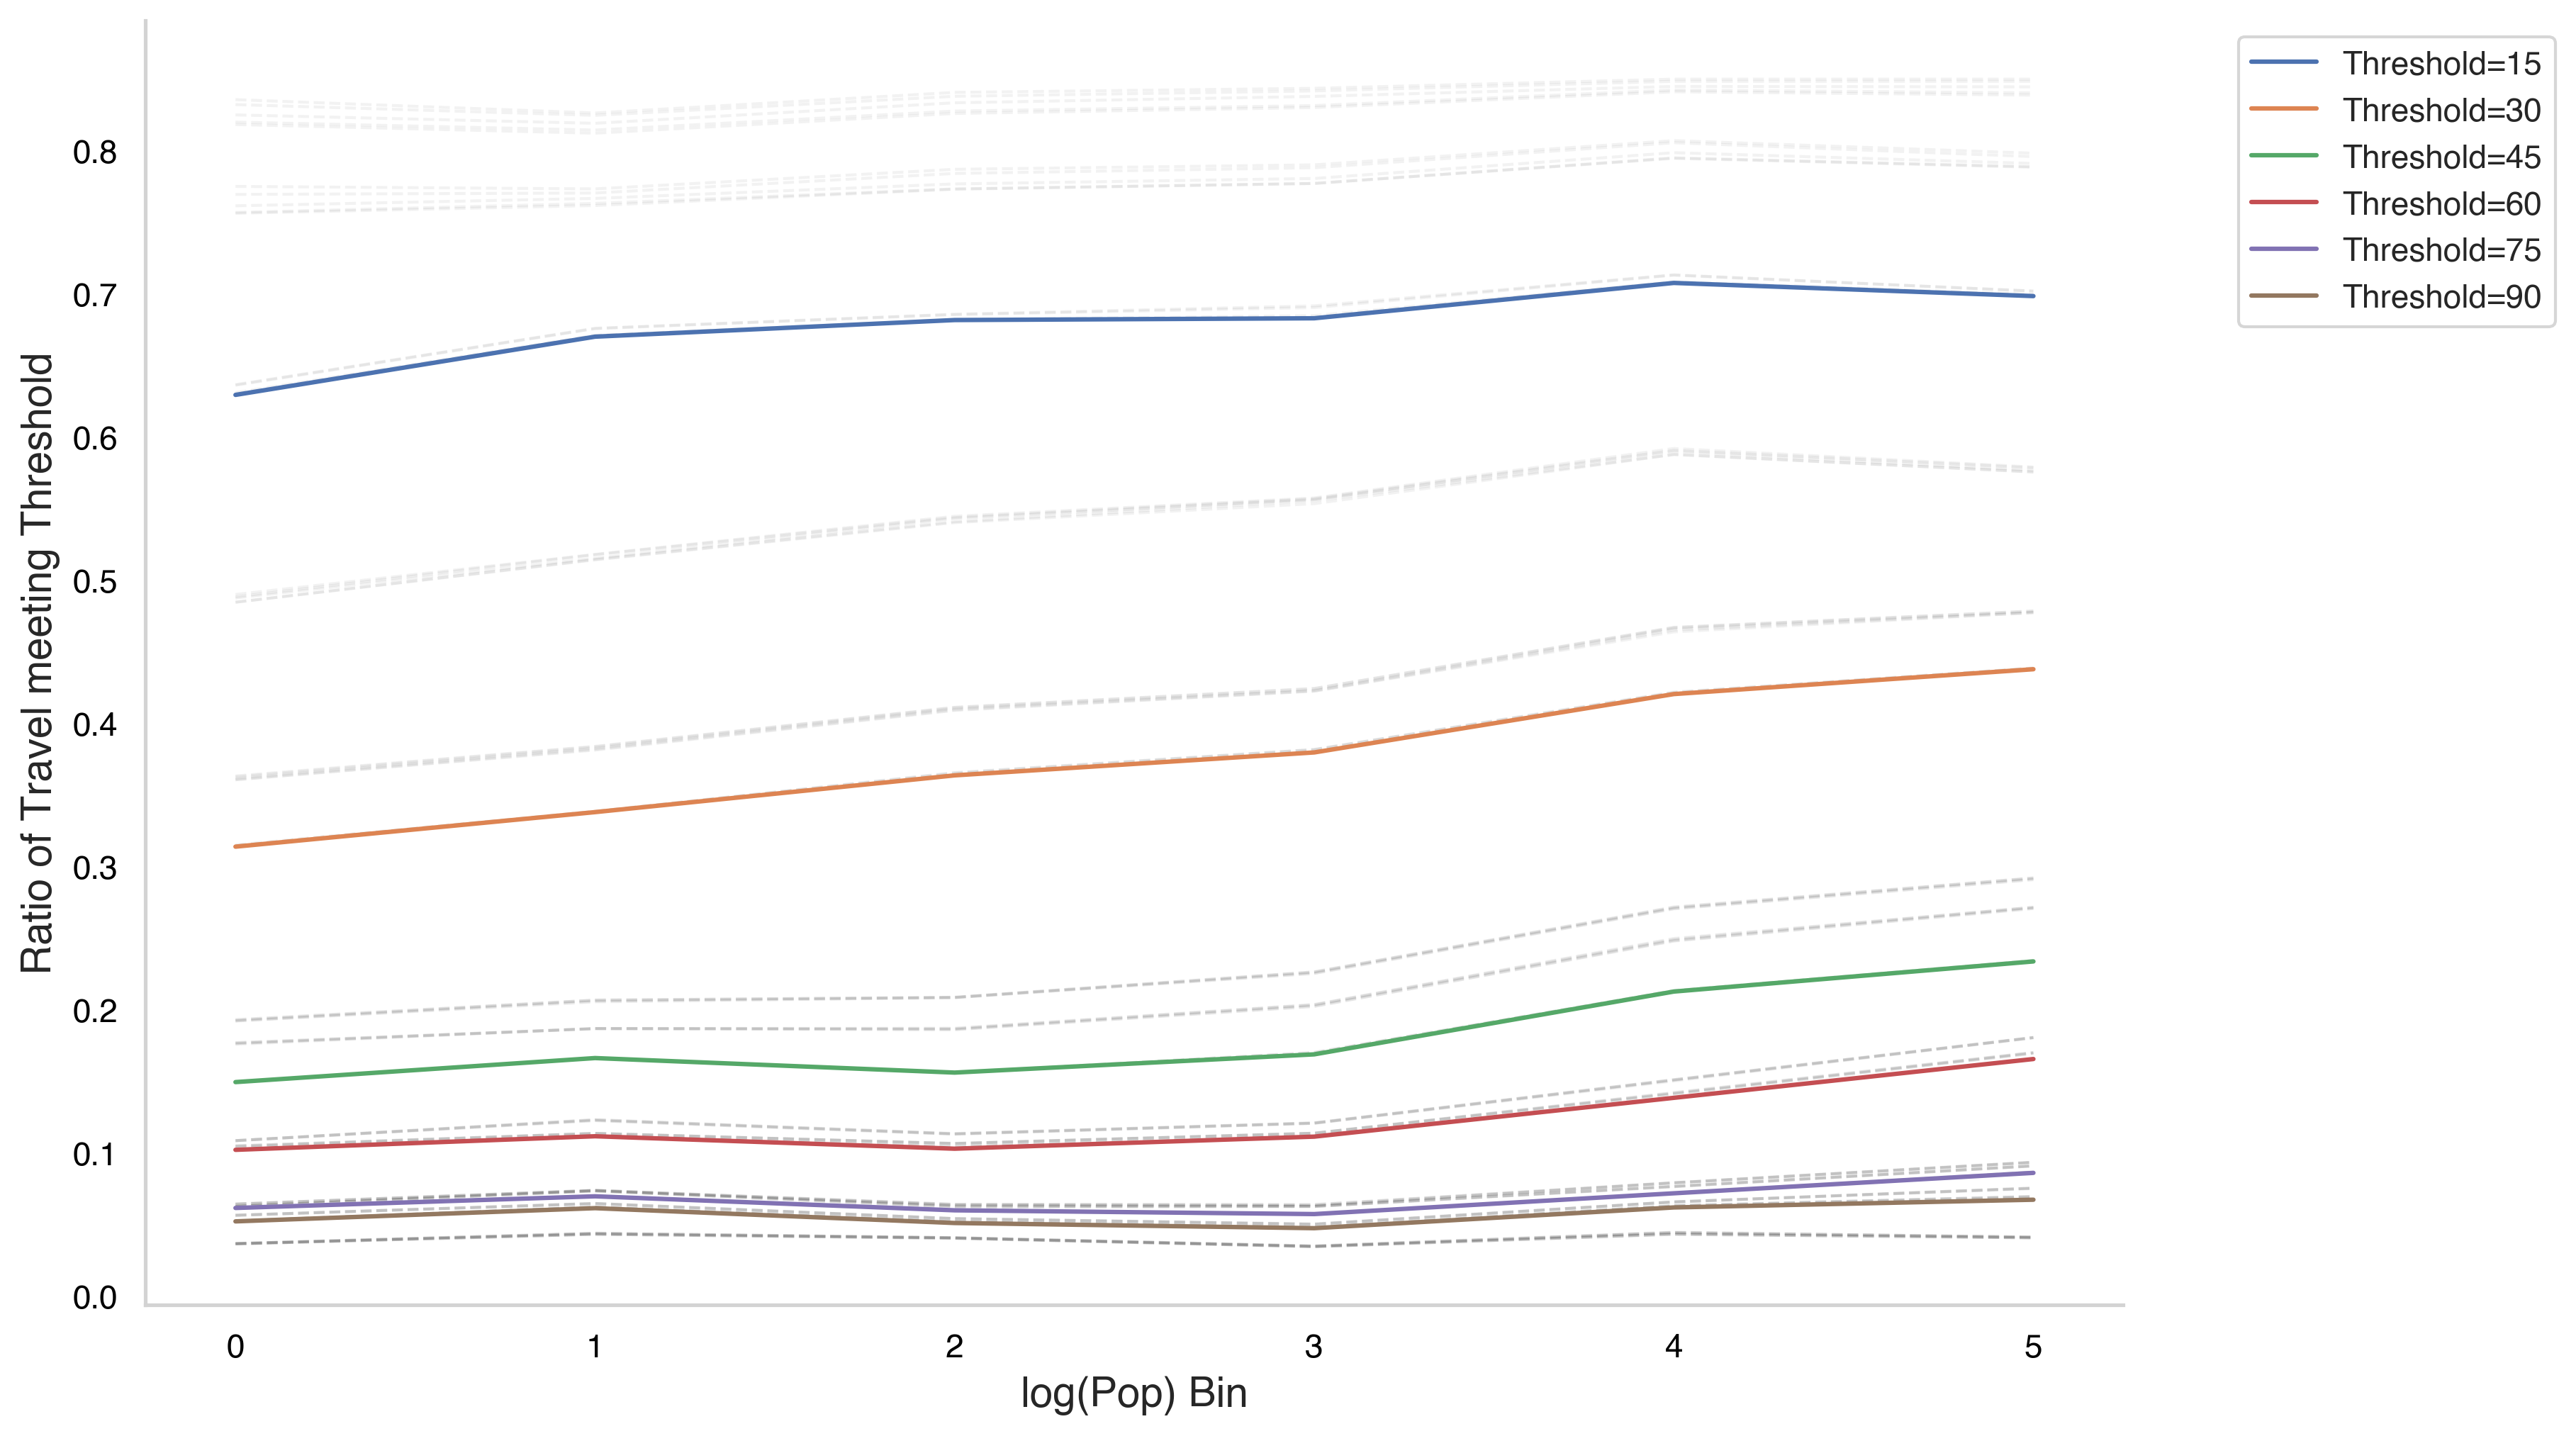

In [432]:
fig,ax = plt.subplots(figsize=(12,8),dpi=300)
for j in range(len(unweighted[0])):
    #plt.plot([i[j] for i in unweighted],linestyle='--',alpha=0.5,label='Bin '+str(j)+' unweighted')
    plt.plot([i[j] for i in weighted],label='Bin '+str(j)+' weighted')

plt.xlabel('Travel Duration Threshold')
plt.ylabel('Ratio of Travel meeting Threshold')
plt.legend()


fig,ax = plt.subplots(figsize=(12,8),dpi=300)

for i in range(len(weighted)):
    if (i+1)%15 == 0:
        plt.plot(weighted[i],label='Threshold='+str(i+1))
    else:
        plt.plot(weighted[i],linewidth=1, linestyle='--', c='black',alpha=0.05)

#for j in range(len(unweighted[0])):
#    #plt.plot([i[j] for i in unweighted],linestyle='--',alpha=0.5,label='Bin '+str(j)+' unweighted')
#    plt.plot([i[j] for i in weighted],label='Bin '+str(j)+' weighted')

plt.xlabel('log(Pop) Bin')
plt.ylabel('Ratio of Travel meeting Threshold')
plt.legend(bbox_to_anchor=(1.05, 1))


## TODO:

1. Generate results filtered to activities: All (inc. travel), Social (11-12-13) with 14 and without, Care (04)
2. Create as single panel (vertical and horizontal array) of 3 plots
3. include CI & use Unchitta's plotter
4. Geospatial- aggregate to CBSA, then calculate Anselin's Moran's I and Getis G again

Send Unchitta values to use for figures: bin to divisions and send the output from the overleaf function

Be judicious in labeling plots
Do robustness plots 

# Generate Broadened Results

In [ ]:
# # Agg data regions for Unchitta
# temp_df = df_actwho.merge(cbsa_region,how='left',on='GTCBSA')

# # Region time output
# temp2 = copy.deepcopy(temp_df)
# temp2 = temp2.groupby('Region').sum()
# temp2['ALL_TU'] = temp2['ALL_TU'] / temp2['NEW_WEIGHT']
# temp2['CARE_TU'] = temp2['CARE_TU'] / temp2['NEW_WEIGHT']
# temp2['SOCIAL_TU'] = temp2['SOCIAL_TU'] / temp2['NEW_WEIGHT']
# temp2 = temp2[temp2.columns.tolist()[-3:]]
# temp2.to_csv('~/Documents/csi/temp_folder/region_time.csv')

# # Region heaviside output
# temp2 = copy.deepcopy(temp_df)
# temp2['ALL_TU'] = temp2['ALL_TU'] / temp2['ALL_TU']
# temp2['CARE_TU'] = temp2['CARE_TU'] / temp2['CARE_TU']
# temp2['SOCIAL_TU'] = temp2['SOCIAL_TU'] / temp2['SOCIAL_TU']
# temp2['ALL_TU'] = temp2['ALL_TU'] * temp2['NEW_WEIGHT']
# temp2['CARE_TU'] = temp2['CARE_TU'] * temp2['NEW_WEIGHT']
# temp2['SOCIAL_TU'] = temp2['SOCIAL_TU'] * temp2['NEW_WEIGHT']
# temp2 = temp2.groupby('Region').sum()
# temp2['ALL_TU'] = temp2['ALL_TU'] / temp2['NEW_WEIGHT']
# temp2['CARE_TU'] = temp2['CARE_TU'] / temp2['NEW_WEIGHT']
# temp2['SOCIAL_TU'] = temp2['SOCIAL_TU'] / temp2['NEW_WEIGHT']
# temp2 = temp2[temp2.columns.tolist()[-3:]]
# temp2.to_csv('~/Documents/csi/temp_folder/region_heaviside.csv')

# # Division time output
# temp2 = copy.deepcopy(temp_df)
# temp2 = temp2.groupby('Division').sum()
# temp2['ALL_TU'] = temp2['ALL_TU'] / temp2['NEW_WEIGHT']
# temp2['CARE_TU'] = temp2['CARE_TU'] / temp2['NEW_WEIGHT']
# temp2['SOCIAL_TU'] = temp2['SOCIAL_TU'] / temp2['NEW_WEIGHT']
# temp2 = temp2[temp2.columns.tolist()[-3:]]
# temp2.to_csv('~/Documents/csi/temp_folder/division_time.csv')

# # Division heaviside output
# temp2 = copy.deepcopy(temp_df)
# temp2['ALL_TU'] = temp2['ALL_TU'] / temp2['ALL_TU']
# temp2['CARE_TU'] = temp2['CARE_TU'] / temp2['CARE_TU']
# temp2['SOCIAL_TU'] = temp2['SOCIAL_TU'] / temp2['SOCIAL_TU']
# temp2['ALL_TU'] = temp2['ALL_TU'] * temp2['NEW_WEIGHT']
# temp2['CARE_TU'] = temp2['CARE_TU'] * temp2['NEW_WEIGHT']
# temp2['SOCIAL_TU'] = temp2['SOCIAL_TU'] * temp2['NEW_WEIGHT']
# temp2 = temp2.groupby('Division').sum()
# temp2['ALL_TU'] = temp2['ALL_TU'] / temp2['NEW_WEIGHT']
# temp2['CARE_TU'] = temp2['CARE_TU'] / temp2['NEW_WEIGHT']
# temp2['SOCIAL_TU'] = temp2['SOCIAL_TU'] / temp2['NEW_WEIGHT']
# temp2 = temp2[temp2.columns.tolist()[-3:]]
# temp2.to_csv('~/Documents/csi/temp_folder/division_heaviside.csv')

In [444]:
df_actwho = pd.read_csv('~/Documents/csi/csi-research/Data/atus_resp_who_agg.csv')
cols = df_actwho.columns.tolist()[6:]
agg_cols = sorted(list(set([i.split("_")[0] for i in cols])))
agg_dict = {i: [j for j in cols if j.split("_")[0]==i] for i in agg_cols}

for k,v in agg_dict.items():
    df_actwho[k+'_agg'] = df_actwho[[i for i in v]].sum(axis=1)

df_actwho = df_actwho[df_actwho.columns.tolist()[:6]+ df_actwho.columns.tolist()[95:]]
cols = df_actwho.columns.tolist()[6:]
df_actwho['ALL_TU'] = df_actwho[cols].sum(axis=1)
df_actwho['SOCIAL_TU'] = df_actwho[['11_agg','12_agg','13_agg','14_agg']].sum(axis=1)
df_actwho['CARE_TU'] = df_actwho['4_agg']
cols = df_actwho.columns.tolist()
df_actwho = df_actwho[cols[:6] + cols[-3:]]
df_actwho = df_actwho.replace(np.nan, 0)
cols = df_actwho.columns.tolist()
for col in cols[-3:]:
    df_actwho[col] = df_actwho[col] / df_actwho['NEW_WEIGHT']

df_actwho_h = copy.deepcopy(df_actwho)
for col in df_actwho_h.columns.tolist()[-3:]:
    df_actwho_h[col] = df_actwho_h[col] / df_actwho_h[col]
    #df_actwho_h[col] = df_actwho_h[col] * df_actwho_h['NEW_WEIGHT']
df_actwho_h = df_actwho_h.replace(np.nan, 0)

In [445]:
test = df_actwho.groupby('bin').sum()
test

TUCASEID     GTCBSA   NEW_WEIGHT           POP   LOG_POP  \
bin                                                                       
0.0   43478477073070680   61980290   33845090.0  3.621267e+08  11242.35   
1.0   78299879039427360  118872100   92167149.0  1.474628e+09  21603.53   
2.0  125105974422678896  183347000  150987826.0  5.545558e+09  36817.81   
3.0  132995030829735312  204296160  175298939.0  1.481552e+10  41813.11   
4.0  170298894276358880  262382140  234584088.0  4.569850e+10  56735.99   
5.0   88627770656554048  129380060  138357396.0  6.614722e+10  31461.09   

       ALL_TU  SOCIAL_TU  CARE_TU  
bin                                
0.0  187479.0   122690.0  14014.0  
1.0  332762.0   221122.0  28426.0  
2.0  536193.0   354339.0  43926.0  
3.0  490527.0   318798.0  39799.0  
4.0  629942.0   427738.0  47890.0  
5.0  342302.0   233298.0  29083.0

In [451]:
binned_col = 'LOG_POP'      # column to bin by
agg_cols = ['ALL_TU', 'SOCIAL_TU','CARE_TU']  # column to aggregate
num_bins = 6                # number of bins
quantiles = False           # False means use equisized bins instead of percentiles
wgt_col = 'NEW_WEIGHT'      # name of weight column if want weighted aggregate statistics
colors = ['steelblue']
ylabel = r'$\langle f(p) \rangle$ : min. fam. availability'
xlabel = r'$p$ : log(Population)'

binned_df, xticks, grid_locs = bin(df_actwho_h, 
                                    binned_col, 
                                    agg_cols, 
                                    num_bins=num_bins, 
                                    quantiles=quantiles, 
                                    wgt_col=wgt_col)

In [452]:
binned_df

ALL_TU_mean  ALL_TU_ci  ALL_TU_std  ALL_TU_n  SOCIAL_TU_mean  SOCIAL_TU_ci  \
0     0.262710   0.018586    0.440208    2155.0        0.224770      0.017629   
1     0.259194   0.013788    0.438249    3881.0        0.223142      0.013101   
2     0.259532   0.010912    0.438413    6201.0        0.216435      0.010251   
3     0.234985   0.010236    0.424022    6592.0        0.199463      0.009647   
4     0.219420   0.008829    0.413878    8441.0        0.185609      0.008295   
5     0.218867   0.012229    0.413525    4393.0        0.189539      0.011592   

   SOCIAL_TU_std  SOCIAL_TU_n  CARE_TU_mean  CARE_TU_ci  CARE_TU_std  \
0       0.417528       2155.0      0.062923    0.010255     0.242881   
1       0.416407       3881.0      0.065871    0.007805     0.248089   
2       0.411847       6201.0      0.056363    0.005741     0.230640   
3       0.399627       6592.0      0.051926    0.005357     0.221894   
4       0.388814       8441.0      0.051543    0.004717     0.221116   
5       0.391981       4393.0      0.047759    0.006307     0.213281   

   CARE_TU_n bin  midpoint  
0     2155.0   1      5.15  
1     3881.0   2      5.54  
2     6201.0   3      5.93  
3     6592.0   4      6.32  
4     8441.0   5      6.70  
5     4393.0   6      7.10

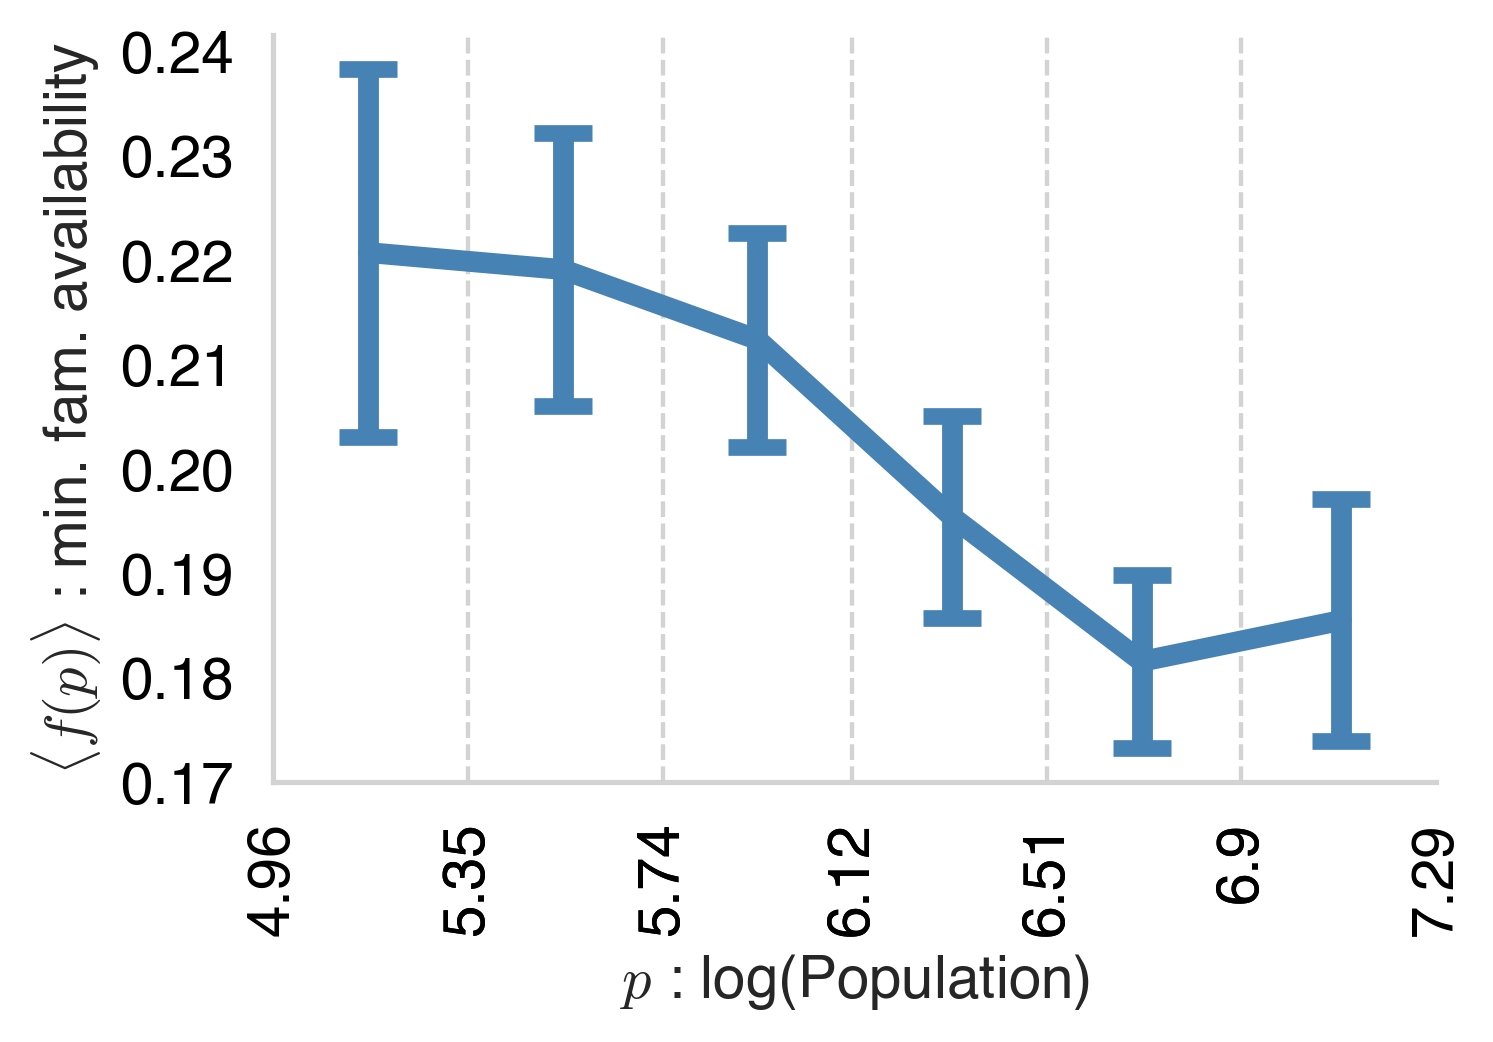

In [453]:
fig, ax = plt.subplots(1,1, dpi=300, figsize=(5,3.3))
binned_scatterplot(binned_df, 
                    [agg_cols[1]], 
                    ax=ax, 
                    xticks=xticks, 
                    grid_locs=grid_locs, 
                    colors=colors,
                    xlabel=xlabel, 
                    ylabel=ylabel, 
                    legend_loc='upper center', 
                    title=None)
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.01))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.show()

In [360]:
binned_df

ALL_TU_mean  ALL_TU_ci  ALL_TU_std  ALL_TU_n  SOCIAL_TU_mean  SOCIAL_TU_ci  \
0     0.262710   0.018586    0.440208    2155.0        0.224770      0.017629   
1     0.259194   0.013788    0.438249    3881.0        0.223142      0.013101   
2     0.259532   0.010912    0.438413    6201.0        0.216435      0.010251   
3     0.234985   0.010236    0.424022    6592.0        0.199463      0.009647   
4     0.219420   0.008829    0.413878    8441.0        0.185609      0.008295   
5     0.218867   0.012229    0.413525    4393.0        0.189539      0.011592   

   SOCIAL_TU_std  SOCIAL_TU_n  CARE_TU_mean  CARE_TU_ci  CARE_TU_std  \
0       0.417528       2155.0      0.062923    0.010255     0.242881   
1       0.416407       3881.0      0.065871    0.007805     0.248089   
2       0.411847       6201.0      0.056363    0.005741     0.230640   
3       0.399627       6592.0      0.051926    0.005357     0.221894   
4       0.388814       8441.0      0.051543    0.004717     0.221116   
5       0.391981       4393.0      0.047759    0.006307     0.213281   

   CARE_TU_n bin  midpoint  
0     2155.0   1      5.15  
1     3881.0   2      5.54  
2     6201.0   3      5.93  
3     6592.0   4      6.32  
4     8441.0   5      6.70  
5     4393.0   6      7.10

In [387]:
import random
x = [random.random() for i in range(100)]
xbar = sum(x)/len(x)

class dumb_ai():
    def __init__(self,x):
        self.x = x
    
    def learn_mean(self):
        self.xbar = sum(self.x)/len(self.x)

    def classify_y(self,y):
        if y>self.xbar:
            self.result = 'above average'
        elif y<self.xbar:
            self.result = 'below average'
        elif y==self.xbar:
            self.result = 'average'
        else:
            self.result = "can't even"
    
    def action(self):
        if self.result == 'above average':
            print("It's bigger")
        elif self.result == 'below average':
            print("It's smaller")
        else: print("I don't know what to tell you")
        

dai = dumb_ai(x)
dai.learn_mean()
dai.classify_y(0.5)
dai.action()


It's bigger


Notes:   
https://en.wikipedia.org/wiki/Weighted_arithmetic_mean to calculate means. Weighted sample frequency section. 

When doing geospatial part, remember that for cities, still need to POPULATION v variable (probability local incoming visitor)

Todo: 
1. 3x2 plots of all activity, social, care, by time spent (with v) and ratio of heaviside 
2. Aggregate division level
3. weekend vs. weekday comparisons of the survival line (sent on slack)
